<a href="https://colab.research.google.com/github/jahnvisahni31/-IncludeHer-Projects/blob/master/AIPND_image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [ ]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [ ]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [ ]:
import json

# Load cat_to_name dictionary from a JSON file
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [ ]:
# Imports here
%matplotlib inline

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# TODO: Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(root=data_dir + '/' + x, transform=data_transforms[x]) for x in ['train', 'valid', 'test']}

# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=64, shuffle=True) for x in ['train', 'valid','test']}

In [ ]:
# TODO: Load the datasets with ImageFolder
# Print dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
print(f"Dataset Sizes: {dataset_sizes}")

Dataset Sizes: {'train': 6552, 'valid': 818, 'test': 819}


In [ ]:
train_Loader_size = len(dataloaders["train"])
valid_Loader_size = len(dataloaders["valid"])
test_Loader_size = len(dataloaders["test"])


# Print the train, validation and test set data sizes
train_Loader_size, valid_Loader_size, test_Loader_size

(103, 13, 13)

### train and build

In [ ]:
# TODO: Build and train your network
import torchvision.models as models
hidden_units = 4096
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 136MB/s]


In [ ]:
classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 102),
    nn.LogSoftmax(dim=1)
)

In [ ]:
val_data = len(dataloaders["valid"])
train_loader = dataloaders["train"]
val_loader = dataloaders["valid"]
model.classifier = classifier

In [ ]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
epochs = 2
steps = 0
running_loss = 0
print_every = 5

for epoch in range(epochs):
    for inputs, labels in dataloaders["train"]:
        steps += 1
        # Move input and label tensors to the default device

        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()

        #Forward pass
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in dataloaders["valid"]:
                    inputs, labels = inputs.to('cuda'), labels.to('cuda')

                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    valid_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Loss: {running_loss/print_every:.3f}.. "
                  f"Validation Loss: {valid_loss/val_data:.3f}.. "
                  f"Accuracy: {accuracy/val_data:.3f}")
            running_loss = 0
            model.train()

Epoch 1/2.. Loss: 10.641.. Validation Loss: 8.488.. Accuracy: 0.088
Epoch 1/2.. Loss: 8.477.. Validation Loss: 6.295.. Accuracy: 0.133
Epoch 1/2.. Loss: 6.176.. Validation Loss: 4.029.. Accuracy: 0.231
Epoch 1/2.. Loss: 4.230.. Validation Loss: 3.319.. Accuracy: 0.267
Epoch 1/2.. Loss: 3.855.. Validation Loss: 3.002.. Accuracy: 0.365
Epoch 1/2.. Loss: 3.417.. Validation Loss: 2.888.. Accuracy: 0.313
Epoch 1/2.. Loss: 3.323.. Validation Loss: 2.663.. Accuracy: 0.369
Epoch 1/2.. Loss: 3.238.. Validation Loss: 2.272.. Accuracy: 0.479
Epoch 1/2.. Loss: 3.065.. Validation Loss: 2.113.. Accuracy: 0.499
Epoch 1/2.. Loss: 3.000.. Validation Loss: 1.956.. Accuracy: 0.518
Epoch 1/2.. Loss: 2.759.. Validation Loss: 1.825.. Accuracy: 0.544
Epoch 1/2.. Loss: 2.717.. Validation Loss: 1.733.. Accuracy: 0.568
Epoch 1/2.. Loss: 2.709.. Validation Loss: 1.637.. Accuracy: 0.591
Epoch 1/2.. Loss: 2.570.. Validation Loss: 1.642.. Accuracy: 0.579
Epoch 1/2.. Loss: 2.421.. Validation Loss: 1.613.. Accuracy: 

In [ ]:
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### tESTING THE MODEL

In [ ]:
test_loss = 0.0
accuracy = 0.0

criterion = nn.NLLLoss()

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model.forward(inputs)
        test_loss += criterion(outputs, labels).item()

        ps = torch.exp(outputs)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()

print(f"Test Loss: {test_loss/len(dataloaders['test']):.3f}.. "
      f"Test Accuracy: {accuracy/len(dataloaders['test']):.3f}")

Test Loss: 1.080.. Test Accuracy: 0.713


In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [ ]:
model.class_to_idx = image_datasets['train'].class_to_idx

In [ ]:
checkpoint = {
    'arch': 'vgg16',  # Save the architecture for future reference
    'class_to_idx': image_datasets['train'].class_to_idx,
    'state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epochs': 2,  # Save the number of epochs for future training continuation
}

torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
import torch
from torchvision import models
from torch import nn
from collections import OrderedDict

def load_checkpoint(filepath):
    # Load the checkpoint
    checkpoint = torch.load(filepath)

    # Load the pre-trained model architecture
    if checkpoint['arch'] == 'vgg16':
        model = models.vgg16(pretrained=True)
    else:
        # Add additional elif statements for other supported architectures
        raise ValueError("Unsupported architecture. Modify the code accordingly.")

    # Freeze parameters to avoid backpropagation
    for param in model.parameters():
        param.requires_grad = False

    # Define a new untrained feed-forward network as a classifier
    classifier = nn.Sequential(
        nn.Linear(25088, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096, len(checkpoint['class_to_idx'])),
        nn.LogSoftmax(dim=1)
    )

    # Replace the classifier in the pre-trained model with the new classifier
    model.classifier = classifier

    # Load the state dictionary
    model.load_state_dict(checkpoint['state_dict'])

    # Attach class_to_idx to the model for easier inference
    model.class_to_idx = checkpoint['class_to_idx']

    return model

# Example usage:
loaded_model = load_checkpoint('checkpoint.pth')

### processing the image

In [ ]:
def process_image(image):
    img = Image.open(image_path)

    # Define the transformation
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Preprocess the image
    img = preprocess(img)

    # Convert to a 4D tensor (batch dimension added)
    img = img.unsqueeze(0)

    return img

In [ ]:
import numpy as np
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.squeeze().numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

### Class Prediction

In [ ]:
image_path = "/content/flowers/test/102/image_08012.jpg"

In [ ]:
def predict(image_path, model, topk=5):
    # Move the model to evaluation mode
    model.eval()

    # Process the image
    img = process_image(image_path)

    # Move the image tensor to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img = img.to(device)

    # Move the model to the same device as the image
    model.to(device)

    # Perform inference
    with torch.no_grad():
        output = model(img)

    # Calculate probabilities and classes
    probs, classes = torch.exp(output).topk(topk)

    # Convert tensors to lists
    probs = probs.squeeze().tolist()
    classes = classes.squeeze().tolist()

    return probs, classes

In [ ]:
probs, classes = predict(image_path, model)
print(f"Top class probability: {probs[0]}")
print(f"Predicted class index: {classes[0]}")
print(f"Predicted class name: {cat_to_name[str(classes[0])]}")

Top class probability: 0.9998592734336853
Predicted class index: 4
Predicted class name: sweet pea


### loading the checkpoint

In [ ]:
img= ("flowers/test/15/image_06351.jpg")
probs, classes = predict(img, model)
print(probs)
print(classes)

[0.9998592734336853, 7.158408698160201e-05, 6.299177766777575e-05, 2.7514017801877344e-06, 2.127844709320925e-06]
[4, 81, 58, 18, 79]


[0.9998592734336853, 7.158408698160201e-05, 6.299177766777575e-05, 2.7514017801877344e-06, 2.127844709320925e-06]
[4, 81, 58, 18, 79]


### Image Preprocessing

In [ ]:
def check_sanity(img, top_prob_array, classes, mapper):
    ''' Function for viewing an image and it's predicted classes.
    '''
    img_filename = img.split('/')[-2]
    img = Image.open(img)

    fig, (ax1, ax2) = plt.subplots(figsize=(6,10), ncols=1, nrows=2)
    flower_name = mapper[img_filename]

    ax1.set_title(flower_name)
    ax1.imshow(img)
    ax1.axis('off')

    y_pos = np.arange(len(top_prob_array))
    ax2.barh(y_pos, top_prob_array)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([mapper[x] for x in classes])
    ax2.invert_yaxis()

<Axes: >

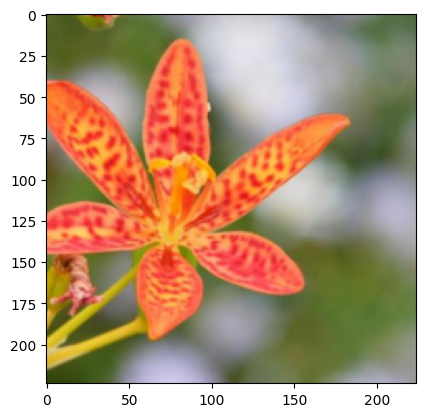

In [ ]:
image =Image.open(test_dir + "/100/image_07899.jpg")
img = process_image(image)
imshow(img)